# Description
This program uses an artificial recurrent nearal network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation using the past 60 day stock price.

In [1]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
sbux = web.DataReader('SBUX', data_source='yahoo', start='2016-04-29', end='2021-04-29')
sbux

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-28,57.360001,56.320000,56.590000,56.419998,9196600.0,51.246868
2016-04-29,56.430000,55.290001,56.020000,56.230000,12133400.0,51.074310
2016-05-02,57.369999,56.110001,56.290001,57.360001,8616200.0,52.100697
2016-05-03,57.060001,56.139999,56.700001,56.250000,7854300.0,51.271248
2016-05-04,56.650002,55.799999,55.980000,56.389999,6508500.0,51.398846
...,...,...,...,...,...,...
2021-04-22,116.879997,115.230003,116.870003,115.919998,5744900.0,115.919998
2021-04-23,117.980003,115.839996,116.019997,117.559998,4555800.0,117.559998
2021-04-26,117.250000,115.059998,116.949997,115.919998,5924900.0,115.919998


In [3]:
sbux.shape

(1259, 6)

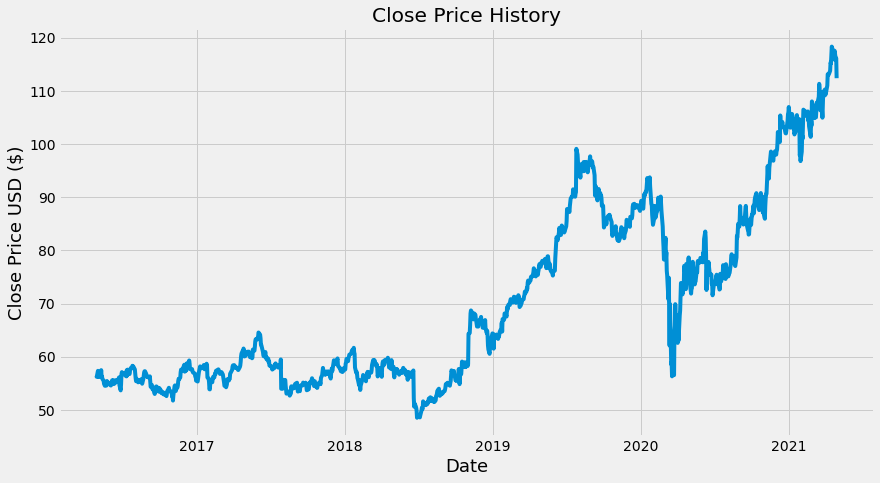

In [4]:
plt.figure(figsize=(13, 7))
plt.title('Close Price History')
plt.plot(sbux['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column
sbux_close = sbux.filter(['Close'])
# Convert the dataframe to a numpy array
sbux_close_dataset = sbux_close.values
# Get the number of rows to train the model on
sbux_train_data_len = math.ceil(len(sbux_close_dataset) * .8)

sbux_train_data_len

1008

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
sbux_scaled_data = scaler.fit_transform(sbux_close_dataset)

sbux_scaled_data

array([[0.11289395],
       [0.11017191],
       [0.12636104],
       ...,
       [0.96532954],
       [0.96862471],
       [0.91489978]])

In [7]:
# Create the training data set
# Create the scaled training data set
sbux_train_data = sbux_scaled_data[0:sbux_train_data_len, :]
# Split the data into x_train and y_train data sets
sbux_x_train = []
sbux_y_train = []

for i in range(60, len(sbux_train_data)):
    sbux_x_train.append(sbux_train_data[i-60:i, 0])
    sbux_y_train.append(sbux_train_data[i, 0])
    if i <= 61:
        print(sbux_x_train)
        print(sbux_y_train)
        print()

[array([0.11289395, 0.11017191, 0.12636104, 0.11045845, 0.11246417,
       0.11045845, 0.11131807, 0.11604583, 0.12822352, 0.11017191,
       0.11117477, 0.10429798, 0.10014324, 0.09083095, 0.0896848 ,
       0.08610313, 0.08710599, 0.08681945, 0.09885384, 0.09469916,
       0.09670488, 0.09469916, 0.0909742 , 0.08997134, 0.08710599,
       0.08696275, 0.10100286, 0.09684812, 0.09570202, 0.10085962,
       0.09068766, 0.09312322, 0.10071632, 0.09756444, 0.10014324,
       0.09699142, 0.09799428, 0.10415474, 0.1012894 , 0.10873926,
       0.08796561, 0.07378221, 0.09040112, 0.11747853, 0.12292262,
       0.12106019, 0.11790831, 0.11762177, 0.11991403, 0.11418335,
       0.11146131, 0.12808022, 0.11375357, 0.12965616, 0.12707736,
       0.12005728, 0.11776501, 0.12893984, 0.1297994 , 0.13409744])]
[0.13481376023697034]

[array([0.11289395, 0.11017191, 0.12636104, 0.11045845, 0.11246417,
       0.11045845, 0.11131807, 0.11604583, 0.12822352, 0.11017191,
       0.11117477, 0.10429798, 0.10

In [8]:
# Convert the x_train and y_train to numpy arrays
sbux_x_train, sbux_y_train = np.array(sbux_x_train), np.array(sbux_y_train)

# Reshape the data
sbux_x_train = np.reshape(sbux_x_train, (sbux_x_train.shape[0], sbux_x_train.shape[1], 1))
sbux_x_train.shape

(948, 60, 1)

In [9]:
# Build the LSTM model
sbux_model = Sequential()
sbux_model.add(LSTM(50, return_sequences = True, input_shape = (sbux_x_train.shape[1], 1)))
sbux_model.add(LSTM(50, return_sequences = False))
sbux_model.add(Dense(25))
sbux_model.add(Dense(1))

In [10]:
# Compile the model
sbux_model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
sbux_model.fit(sbux_x_train, sbux_y_train, batch_size=1, epochs=1)

948/948 [==============================] - 14s 13ms/step - loss: 0.0063


In [12]:
# Create the testing data set
# Create a new array containing scaled values from index 948 to 1008
sbux_test_data = sbux_scaled_data[sbux_train_data_len - 60:, :]
# Create the data sets x_test and y_test
sbux_x_test = []
sbux_y_test = sbux_close_dataset[sbux_train_data_len:, :]

for i in range(60, len(sbux_test_data)):
    sbux_x_test.append(sbux_test_data[i-60:i, 0])

In [13]:
# Convert the data to a numpy array
sbux_x_test = np.array(sbux_x_test)

In [14]:
# Reshape the data
sbux_x_test = np.reshape(sbux_x_test, (sbux_x_test.shape[0], sbux_x_test.shape[1], 1))

In [15]:
# Get the models predicted price values
sbux_predictions = sbux_model.predict(sbux_x_test)
sbux_predictions = scaler.inverse_transform(sbux_predictions)

In [16]:
# Get the root mean squared error (RMSE)
sbux_rmse = np.sqrt(np.mean(sbux_predictions - sbux_y_test) ** 2)
sbux_rmse

0.22003705758022596

In [17]:
# Plot the data
sbux_train = sbux_close[:sbux_train_data_len].copy()
sbux_valid = sbux_close[sbux_train_data_len:].copy()
sbux_valid.loc[:, 'Predictions'] = sbux_predictions

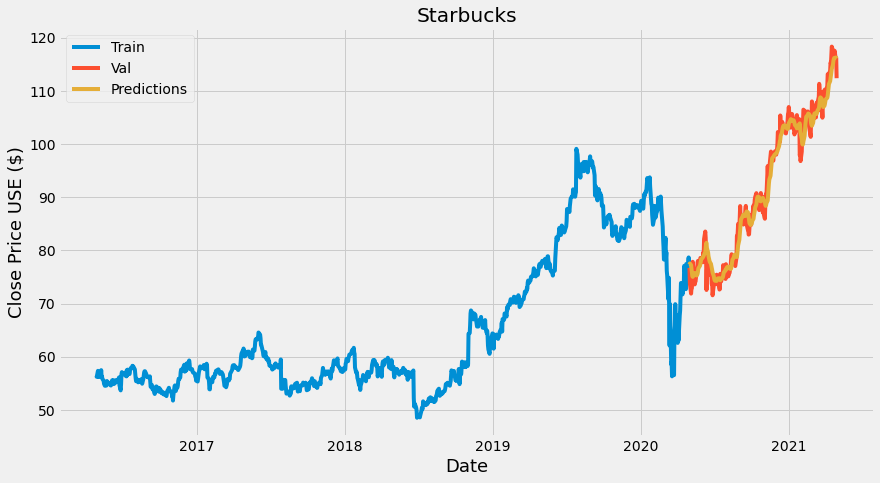

In [18]:
#Visualize the data
plt.figure(figsize=(13, 7))
plt.title('Starbucks')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USE ($)', fontsize=18)
plt.plot(sbux_train['Close'])
plt.plot(sbux_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [19]:
# Show the valid and predicted prices
sbux_valid

,Close,Predictions
Date,,
2020-04-30,76.730003,77.366043
2020-05-01,73.790001,77.555458
2020-05-04,71.889999,77.261818
2020-05-05,72.900002,76.531845
2020-05-06,72.959999,75.803185
...,...,...
2021-04-22,115.919998,116.199341
2021-04-23,117.559998,116.184814
2021-04-26,115.919998,116.296448


In [20]:
# Get the quote
new_sbux = web.DataReader('SBUX', data_source='yahoo', start='2016-04-29', end='2021-04-29')

# Create a new dataframe
new_sbux_close = new_sbux.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
new_sbux_last_60_days = new_sbux_close[-60:].values

# Scale the data to be values between 0
new_sbux_last_60_days_scaled = scaler.transform(new_sbux_last_60_days)

# Create an empty list
new_sbux_x_test = []

# Append the last 60 days
new_sbux_x_test.append(new_sbux_last_60_days_scaled)

# Convert the x_test data set to a numpy array
new_sbux_x_test = np.array(new_sbux_x_test)

# Reshape the data
new_sbux_x_test = np.reshape(new_sbux_x_test, (new_sbux_x_test.shape[0], new_sbux_x_test.shape[1], 1))

# Get the predicted scaled price
new_sbux_pred_price = sbux_model.predict(new_sbux_x_test)

#undo the scaling
new_sbux_pred_price = scaler.inverse_transform(new_sbux_pred_price)
print(new_sbux_pred_price)

[[115.4149]]
